# Task 3 - CNNs, ResNets, Transfer Learning and Grad-CAM

### Deadline Tuesday, June 17, 2025 at 11:59 p.m

### Time required to solve this exercise sheet
**As you will train a large number of models on this exercise sheet, model training will require an increased amount of time. So we recommend to start working on this sheet early.**

# IMPORTANT SUBMISSION INSTRUCTIONS

- When you're done, download the notebook and rename it to task3_[name].ipynb
- Only submit the `ipynb` file, no other file is required.
- The deadline is strict.
- Minimal requirement for passing: solving all code cells.

Implementation
- Do not change the cells which are marked as "Do not change", similarly write your solution to the marked cells.

# Topics

In this exercise sheet, you will:
- Work with a dataset consisting of images of electronic waste.
- Implement a CNN for classification
- Compare MLP and CNN
- Vary architecture to improve model performance
- Implement a ResNet
- Apply transfer learning using ResNet50
- Apply Grad-CAM class activation visualization

*We are looking forward to seeing your solutions! Have fun!*

## Tutorials

Some python libraries are required to accomplish the tasks assigned in this homework. If you feel like you need to follow a tutorial before, feel free to do so:
*   [Scikit-learn Tutorials](https://www.tensorflow.org/tutorials)
*   [TensorFlow Tutorials](https://scikit-learn.org/stable/tutorial/index.html)
*   [Matplotlib Tutorials](https://matplotlib.org/stable/tutorials/index.html)

## Imports

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras import models, layers, optimizers, losses, callbacks
import seaborn as sns
import matplotlib.pyplot as plt

# gpus = tf.config.list_physical_devices('GPU')
# tf.config.set_visible_devices(gpus, 'GPU')

# Subtask 2.1

## Loading e-waste dataset



The data is available here: [https://tucloud.tu-clausthal.de/index.php/s/HMle0Ievm3ITBu0](https://tucloud.tu-clausthal.de/index.php/s/HMle0Ievm3ITBu0)

Password is: EK_data


In this task, we are looking for an automated classification of electronic waste to seven classes, e.g. those containing wood, glass etc. To this end, a dataset containing images of different types of electronic waste is prepared. The data is provided as a `zip` file. Please, extract it in a directory. 

Use `tf.keras.utils.image_dataset_from_directory` to load the dataset from the directory. We have in total 9,906 samples and 7 classes. 

#### TODO

- Consider 80% of the samples for training and 20% for validation.
- Use a batch size of 32
- Resize the image to image height and width of 224 $\times$ 224.

In [ ]:
# TODO load dataset from directory
data_dir = 
batch_size = 32
img_height = 224
img_width = 224
num_classes = 7

train_ds, val_ds = image_dataset_from_directory(
            data_dir,
            validation_split=
            subset="both",
            seed=123,
            image_size= 
            batch_size=
            )


#### TODO
- Print the name of classes. 

In [ ]:
####################
## YOUR CODE HERE ##
####################

Let us visualize some samples of the training dataset and their corresponding labels. 

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    # plt.title(class_names[labels[i]])
    plt.axis("off")


# Subtask 2.2

## Convolution and Pooling operations

![model]( 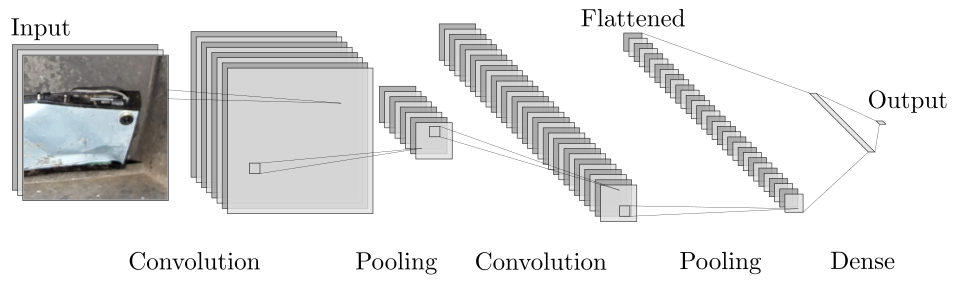)



Let us start by applying convolution and pooling operations on a batch of samples.
#### TODO
 - Take one batch of samples from the training data set.
 - Create a convolution layer containing 8 filters with the size of 3 $\times$ 3 and stride of 1.
 - Apply convolution on the images.
 - Print the input shape.
 - Print the output shape.

In [ ]:
image, label =  zip(*train_ds.take(1))
x = image[0]

####################
## YOUR CODE HERE ##
####################

#### TODO
- Print shape of the trainable parameters of the layer. You can use `get_weights()` method.

In [ ]:
####################
## YOUR CODE HERE ##
####################

#### TODO
 - Perform zero padding to get the same shape after convolution. 

In [ ]:
####################
## YOUR CODE HERE ##
####################

#### TODO
 - Perform convolution as before but with the stride of 2.
 - Print the input and output shapes.

In [ ]:
####################
## YOUR CODE HERE ##
####################

#### TODO
- Create a max pooling layer with the pool size of `(2, 2)`.
- Apply the max pooling operation on a batch of samples.
- Print the input and output shapes.
- Print shape of the trainable parameters.

In [ ]:
####################
## YOUR CODE HERE ##
####################

#### TODO
- Create a global average pooling layer.
- Apply the global average pooling operation on a batch of samples.
- Print the input and output shapes.


In [ ]:
####################
## YOUR CODE HERE ##
####################

# Subtask 2.3

## Convolutional neural networks (CNNs)

#### TODO
- Implement a simple CNN model for classification. You need the following layers:
    - Input
    - Rescaling by a factor of 1/225.
    - Convolution with 8 filters of the size of 3 $\times$ 3 and stride 1.
    - Max pooling with a pool size of `(2, 2)`.
    - Flatten
    - Dense with number of neurons equal to number of classes and `softmax` activation function.
- Print `model.summary()`.
- Train the network using `Adam` optimizer with the learning rate of 0.001 for 20 epochs.
- Use `SparseCategoricalCrossentropy` as the loss function.
- Compute and report the accuracy during training. In `model.compile()` you can set `metrics = ['accuracy']`.
- Use model checkpoints to save the best model.
- Plot the learning curves using the `plot_learning_curves` function provided below. 
    


In [ ]:
def plot_learning_curves(hist):
    epochs = np.arange(0, len(hist.history['loss'])) + 1
    sns.set(style='ticks')
    fig, ax = plt.subplots(1, 2, figsize = (10, 4), sharex=True)
    ax[0].plot(epochs, hist.history['loss'], label = 'Training loss', marker = 'o', ls = '--')
    ax[0].plot(epochs, hist.history['val_loss'], label = 'Validation loss', marker = 'o', ls = '--')

    ax[1].plot(epochs, hist.history['accuracy'], label = 'Training accuracy', marker = 'o', ls = '--')
    ax[1].plot(epochs, hist.history['val_accuracy'], label = 'Validation accuracy', marker = 'o', ls = '--')

    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss vs. Epoch')
    ax[0].legend()

    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy vs. Epoch')
    ax[1].legend()
    sns.despine(trim=True, offset=5)

In [ ]:
inputs = layers.Input(shape = (img_height, img_width, 3))
x = layers.Rescaling(1./255)(inputs)
x = ...
outputs = ...

model = ...
model.summary()

In [ ]:
# TODO compile and train the model

####################
## YOUR CODE HERE ##
####################


In [ ]:
# TODO plot learning curves

####################
## YOUR CODE HERE ##
####################

# Subtask 2.4

## Compare CNN with MLP

#### TODO
- Train an MLP model and compare the results with the CNN model you trained regarding the performance of the model, time of training, and the number of parameters.

In [ ]:
####################
## YOUR CODE HERE ##
####################

# Subtask 2.5

## Model architecture

We did only one step of down-sampling using the max-pooling layer. From `model.summary()` we can see that a Dense layer that maps a vector with the size of 111 $\times$ 111 $\times$ 8 to the output size of 7 is needed. Having a layer with such large number of parameters is prone to over-fitting. Let us perform more steps of down-sampling to avoid this.

#### TODO
 - Keep everything the same as the previous TODO, but perform four steps of convolution and max-pooling rather than just one.
 - In each step of down-sampling double the number of filters.


In [ ]:
inputs = ...

model = ...
model.summary()

In [ ]:
# TODO compile and train the model

####################
## YOUR CODE HERE ##
####################


In [ ]:
# TODO plot learning curves

####################
## YOUR CODE HERE ##
####################

You can also perform global average pooling and down-sample the input image to a vector. Let us implement a `GlobalAveragePooling2D` layer rather than the `Flatten` layer. 

#### TODO
- Keep every setting as the previous TODO, and replace the `Flatten` layer with `GlobalAveragePooling2D`.
- Train the model for 20 epochs.

In [ ]:
inputs = ...

model = ...
model.summary()

In [ ]:
# TODO compile and train the model

####################
## YOUR CODE HERE ##
####################

In [ ]:
# TODO plot learning curves

####################
## YOUR CODE HERE ##
####################

# Subtask 2.6
## Challenge

#### TODO
- Modify the architecture to obtain higher accuracy. 
- You may use regularization and `BatchNormalization`.

In [ ]:
####################
## YOUR CODE HERE ##
####################

# Subtask 2.7
## ResNet architecture


"*Deeper neural networks are more difficult to train.  We present a residual learning framework to ease the training of networks that are substantially deeper than those used previously.*" [ https://arxiv.org/pdf/1512.03385.pdf]

That was the intention of He et al. to develop residual networks.

A ResNet is built of blocks which are called the *Residual Blocks*. 
A residual block uses *skip connections* - shortCuts — to jump over some layers to skip some activations.
The Resnet skips connections via addition.

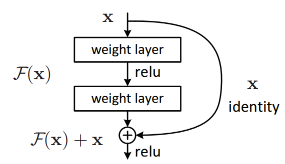

#### **Questions**
- Which problems do using skip connections solve?
- Why is a residual network called residual? 
- When is the advantage of ResNets over 'normal' CNNs most visible?

<span style='color:red'>**Your answer:**</span>

...

**Hints**

- A function for residual block is given below. Here, the image resolution is downsampled by strided convolution (stride=2 in the Conv2d layers).
- For the adding part, the dimensions obviously have to be the same. This is accomplished by using stride=2 in the first Conv2d layer of the block while the second layer does not change the dimensions. We also process the input `x` by a strided convolution with a filter size of `(1, 1)`.

In [ ]:
def Res_Block(x, filters):
    y = layers.Conv2D(filters, (3, 3), strides = 2, padding = 'same')(x)
    y = layers.ReLU()(y)
    y = layers.BatchNormalization()(y)

    y = layers.Conv2D(filters, (3, 3), strides = 1, padding = 'same')(y)
    y = layers.ReLU()(y)
    y = layers.BatchNormalization()(y)

    x = layers.Conv2D(filters, (1, 1), strides = 2, padding = 'same')(x)
    out = layers.Add()([x, y])
    out = layers.ReLU()(out)
    out = layers.BatchNormalization()(out)
    return out

#### TODO
- Create a model containing four residual blocks with filter sizes of 8, 16, 32, and 64.
- Train the model and plot the learning curves.

In [ ]:
inputs = ...

model = ...
model.summary()

In [ ]:
# TODO compile and train the model

####################
## YOUR CODE HERE ##
####################

In [ ]:
# TODO plot learning curves

####################
## YOUR CODE HERE ##
####################

# Subtask 2.8
## Transfer learning and fine-tuning

### TensorFlow tutorials
- [Transfer learning and fine-tuning](https://www.tensorflow.org/tutorials/images/transfer_learning)


In this subtask we will learn how to classify images of by using transfer learning from a pre-trained network. A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. You either use the pre-trained model as is or use transfer learning to customize this model to a given task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

Here, we will use `ResNet50`$^1$ pre-trained on `ImageNet` dataset. Let us load the model from `tensorflow.keras.applications`. We remove the fully-connected layers by setting `include_top` as False.

$^1$ [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) (CVPR 2015)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

Note that we will freeze the parameters of the `ResNet50` by setting `model.trainable = False`.

In [ ]:
input_shape = (img_height, img_width, 3)
input_tensor = preprocess_input(layers.Input(shape=input_shape, name = 'model_inputs'))
resnet50 = ResNet50(weights='imagenet', input_shape=input_shape, input_tensor=input_tensor, include_top=False,)

resnet50.trainable = False

We will add new layers on top of the pre-trained `ResNet50` and perform the training process only for the new layers. 
#### TODO
- Add a global average pooling and a fully-connected layer on top the `ResNet` model.
- Train the model as before.
- Plot the learning curves. 

In [ ]:
x = resnet50.output
x = ...
outputs = ...

model_resnet50 = models.Model(resnet50.input, outputs)
print(model_resnet50.summary())

In [ ]:
# TODO compile and train the model

####################
## YOUR CODE HERE ##
####################

In [ ]:
# TODO plot learning curves

####################
## YOUR CODE HERE ##
####################

#### **Questions**
- Does the performance increase compared to the CNNs you trained before? Why/Why not?
- Compare the runtime of your ResNet and ResNet50.

<span style='color:red'>**Your answer:**</span>

...

# Subtask 2.9

## Model performance

#### TODO
- Use the best model you have trained and for the validation dataset report:
    - accuracy
    - precision
    - recall
- Plot the confusion matrix.
    
    


In [ ]:

####################
## YOUR CODE HERE ##
####################

In [ ]:
####################
## YOUR CODE HERE ##
####################

# Subtask 2.10
## Grad-CAM class activation visualization

Class Activation Maps (CAMs) are visualization methods used for explaining deep learning models. The Grad-CAM technique utilizes the gradients of the classification score with respect to the final convolutional feature map, to identify the parts of an input image that most impact the classification score. The places where this gradient is large are exactly the places where the final score depends most on the data.

Here, we will use the Grad-Cam algorithm to explain why the model is classified an input sample to a certain class.

### TensorFlow Tutorials:
- [Grad-CAM class activation visualization](https://keras.io/examples/vision/grad_cam/#the-gradcam-algorithm)

#### TODO

Employ the model you trained based on the `ResNet50` model. The Grad-CAM algorithm is provided below. 

- Use the function and compute the heatmap for an input sample from the validation dataset.
- You should compute the heatmap with respect to the final convolutional feature map: `last_conv_layer_name = conv5_block3_out`. To get the values for `last_conv_layer_name` use `model.summary()` to see the names of all layers in the model.
- Plot the heatmap.


### The Grad-CAM algorithm

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


#### TODO
 - Visualize one of the samples in the validation dataset.
 - Put the label as the title of the image.

In [ ]:
# TODO visualize one image sample

####################
## YOUR CODE HERE ##
####################

In [ ]:
# TODO compute and plot the heatmap

####################
## YOUR CODE HERE ##
####################

You can use the following function to create and display a superimposed visualization:

In [ ]:
def save_and_display_gradcam(img, heatmap, alpha=0.6):

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)

    plt.figure(figsize=(8, 8))
    plt.imshow(superimposed_img)



# TODO plot the superimposed image
####################
## YOUR CODE HERE ##
####################


#### **Questions**
- Explain the model performance based on the obtained results from Grad-CAM.
- Does the model perform properly? Why/why not?
- How we can improve the model performance?

<span style='color:red'>**Your answer:**</span>

...